El dataset elegido es de ventas de bicicletas y accesorios. Hice una revision general y una limpieza de datos duplicados, tambien cambie algunos tipos de datos.
Las preguntas a responder serán : 
¿Cuales son los articulos mas vendidos y menos por unidad?
¿Cuales son los articulos que han dejado mas y menos ganancia total?
¿Cuales son los articulos que han dejado mas y menos ganancia en porcentaje?
¿Como se han comportado los 3 mejores y peores productos a lo largo del tiempo? (Periodo Trimestral)
¿Que edad tienen nuestros clientes? (Repartir en grupos de 5 en 5)
¿Que grupo de edad tiene mayor profit?
Teniendo en cuenta que hay grupos con mas o menos personas:
¿Que grupo tiene mayor profit en promedio?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/PC/Desktop/Data Science/Datasets/Ventas Bicicletas/Sales.csv")
print(df.head())

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [3]:
df.shape

(113036, 18)

In [4]:
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [5]:
print(df.dtypes)

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


In [6]:
df["Date"] = df["Date"].astype("datetime64[ns]")
print(df["Date"].dtype)

datetime64[ns]


In [7]:
df["Age_Group"] = df["Age_Group"].astype("category")
df["Customer_Gender"] = df["Customer_Gender"].astype("category")
df["Country"] = df["Country"].astype("category")
df["State"] = df["State"].astype("category")
df["Product_Category"] = df["Product_Category"].astype("category")
df["Sub_Category"] = df["Sub_Category"].astype("category")
print(df.dtypes)

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                 category
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object


In [8]:
print(df.duplicated().sum())

1000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
Cantidad_unidades_producto = df.groupby("Product")["Order_Quantity"].sum().reset_index()

In [11]:
Cantidad_unidades_producto.rename(columns={'Order_Quantity': 'Total_unidades_vendidas'}, inplace=True)


In [12]:
top_10_mas_vendidos = Cantidad_unidades_producto.sort_values(
    by='Total_unidades_vendidas',
    ascending=False
).head(10)
print("\n Los 10 Productos Más Vendidos por Cantidad de Unidades ")

print(top_10_mas_vendidos.round(0))



 Los 10 Productos Más Vendidos por Cantidad de Unidades 
                     Product  Total_unidades_vendidas
126    Water Bottle - 30 oz.                   162051
52       Patch Kit/8 Patches                   155310
23        Mountain Tire Tube                   100915
0               AWC Logo Cap                    67316
101    Sport-100 Helmet, Red                    63652
6      Fender Set - Mountain                    62118
99   Sport-100 Helmet, Black                    62072
56            Road Tire Tube                    61305
100   Sport-100 Helmet, Blue                    55855
103        Touring Tire Tube                    55794


In [13]:
top_10_menos_vendidos = Cantidad_unidades_producto.sort_values(
    by='Total_unidades_vendidas',
    ascending=True
).head(10)
print("\n Los 10 Productos Menoss Vendidos por Cantidad de Unidades ")

print(top_10_menos_vendidos.round(0))



 Los 10 Productos Menoss Vendidos por Cantidad de Unidades 
                     Product  Total_unidades_vendidas
46    Mountain-500 Black, 52                       40
50   Mountain-500 Silver, 48                       52
87          Road-650 Red, 52                       52
117    Touring-3000 Blue, 50                       70
25    Mountain-100 Black, 42                       72
31   Mountain-100 Silver, 48                       75
29   Mountain-100 Silver, 42                       77
30   Mountain-100 Silver, 44                       83
125  Touring-3000 Yellow, 62                       83
24    Mountain-100 Black, 38                       94


In [14]:
suma_de_producto = df.groupby('Product').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

In [15]:
suma_de_producto['Promedio_profit_porcentual'] = (suma_de_producto['Total_Profit'] / suma_de_producto['Total_Revenue']) * 100


In [16]:
Peores_10_promedios_profit = suma_de_producto.sort_values(
    by='Promedio_profit_porcentual',
    ascending=True
).head(10)
print(Peores_10_promedios_profit[["Product","Promedio_profit_porcentual"]])

                            Product  Promedio_profit_porcentual
96   Short-Sleeve Classic Jersey, M                   10.227819
95   Short-Sleeve Classic Jersey, L                   12.899783
98  Short-Sleeve Classic Jersey, XL                   13.168366
97   Short-Sleeve Classic Jersey, S                   13.301874
0                      AWC Logo Cap                   14.203416
19      Long-Sleeve Logo Jersey, XL                   14.894558
18       Long-Sleeve Logo Jersey, S                   16.129947
16       Long-Sleeve Logo Jersey, L                   17.456771
17       Long-Sleeve Logo Jersey, M                   17.734949
72            Road-350-W Yellow, 44                   26.536622


In [17]:
Mejores_10_promedios_profit = suma_de_producto.sort_values(
    by='Promedio_profit_porcentual',
    ascending=False
).head(10)
print(Mejores_10_promedios_profit[["Product","Promedio_profit_porcentual"]])

                        Product  Promedio_profit_porcentual
56               Road Tire Tube                   72.482068
53              Racing Socks, L                   63.475949
54              Racing Socks, M                   63.194757
55             Road Bottle Cage                   62.819928
6         Fender Set - Mountain                   60.116374
21                 ML Road Tire                   60.057982
20             ML Mountain Tire                   59.773269
7              HL Mountain Tire                   59.752170
14             LL Mountain Tire                   59.721285
129  Women's Mountain Shorts, S                   59.566786


In [18]:
product_total_profit = df.groupby('Product')['Profit'].sum().reset_index()
product_total_profit.rename(columns={'Profit':'Total_profit'}, inplace=True)


In [19]:
Peores_10_total_profit = product_total_profit.sort_values(
    by="Total_profit",
    ascending=True
).head(10)
print(Peores_10_total_profit)

                     Product  Total_profit
46    Mountain-500 Black, 52          7487
87          Road-650 Red, 52          9345
50   Mountain-500 Silver, 48          9778
117    Touring-3000 Blue, 50         13424
125  Touring-3000 Yellow, 62         18371
51   Mountain-500 Silver, 52         19074
118    Touring-3000 Blue, 54         19634
49   Mountain-500 Silver, 44         20070
124  Touring-3000 Yellow, 58         20997
79        Road-650 Black, 44         21341


In [20]:
Mejores_10_total_profit = product_total_profit.sort_values(
    by="Total_profit",
    ascending=False
).head(10)
print(Mejores_10_total_profit)

                     Product  Total_profit
32    Mountain-200 Black, 38       1302237
61          Road-150 Red, 62       1237388
36   Mountain-200 Silver, 42       1226878
101    Sport-100 Helmet, Red       1191175
35   Mountain-200 Silver, 38       1155311
99   Sport-100 Helmet, Black       1140795
34    Mountain-200 Black, 46       1075401
100   Sport-100 Helmet, Blue       1047701
59          Road-150 Red, 52       1044569
33    Mountain-200 Black, 42       1032061


In [21]:
metricas_del_producto = df.groupby('Product').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Unidades_vendidas=('Order_Quantity', 'sum')
).reset_index()

print(metricas_del_producto.head(5))

                  Product  Total_Profit  Total_Unidades_vendidas
0            AWC Logo Cap         78008                    67316
1  All-Purpose Bike Stand        200350                     2391
2   Bike Wash - Dissolver        116008                    27579
3         Classic Vest, L        157319                     4651
4         Classic Vest, M        161740                     4876


In [22]:
avg_profit = metricas_del_producto['Total_Profit'].mean()
avg_unidades_vendidas = metricas_del_producto['Total_Unidades_vendidas'].mean()

print("\n Valores Promedio de las Métricas del Negocio ")
print(f"Profit Total Promedio por Producto: {avg_profit:,.2f}")
print(f"Unidades Vendidas Promedio por Producto: {avg_unidades_vendidas:,.0f}")


 Valores Promedio de las Métricas del Negocio 
Profit Total Promedio por Producto: 246,509.53
Unidades Vendidas Promedio por Producto: 10,259


In [23]:
df["Periodo_temporal"] = df["Date"].dt.to_period("Q")
df["Periodo_temporal_separado"] = df["Periodo_temporal"].astype(str).str.replace("Q", "-Q")

print(df[["Date", "Periodo_temporal", "Periodo_temporal_separado"]].head())


        Date Periodo_temporal Periodo_temporal_separado
0 2013-11-26           2013Q4                   2013-Q4
1 2015-11-26           2015Q4                   2015-Q4
2 2014-03-23           2014Q1                   2014-Q1
3 2016-03-23           2016Q1                   2016-Q1
4 2014-05-15           2014Q2                   2014-Q2


In [24]:
Profit_por_periodo = df.groupby(["Periodo_temporal_separado", "Product"]).agg(
    Profit_total_periodo=("Profit", "sum")
).reset_index()

periodos = Profit_por_periodo["Periodo_temporal_separado"].unique()

for periodo in periodos:
    print(f"\n-- Analisis para el periodo {periodo} --")
    datos_del_periodo = Profit_por_periodo[Profit_por_periodo['Periodo_temporal_separado'] == periodo]
    mejores_productos = datos_del_periodo.sort_values(
        by='Profit_total_periodo',
        ascending=False
    ).head(3)
    peores_productos = datos_del_periodo.sort_values(
        by='Profit_total_periodo',
        ascending=True
    ).head(3)

    print("\nTop 3 Productos por Profit Total:")
    print(mejores_productos.to_string(index=False))

    print("\nBottom 3 Productos por Profit Total:")
    print(peores_productos.to_string(index=False))



-- Analisis para el periodo 2011-Q1 --

Top 3 Productos por Profit Total:
Periodo_temporal_separado          Product  Profit_total_periodo
                  2011-Q1 Road-150 Red, 52                 52627
                  2011-Q1 Road-150 Red, 48                 50922
                  2011-Q1 Road-150 Red, 62                 44603

Bottom 3 Productos por Profit Total:
Periodo_temporal_separado                Product  Profit_total_periodo
                  2011-Q1 Mountain-500 Black, 48                   234
                  2011-Q1     Road-650 Black, 44                   395
                  2011-Q1       Road-650 Red, 48                   466

-- Analisis para el periodo 2011-Q2 --

Top 3 Productos por Profit Total:
Periodo_temporal_separado          Product  Profit_total_periodo
                  2011-Q2 Road-150 Red, 62                 84833
                  2011-Q2 Road-150 Red, 48                 53876
                  2011-Q2 Road-150 Red, 56                 45017

Bottom 

In [25]:
top_products = df.groupby('Product')['Profit'].sum().nlargest(3).index
peores_products = df.groupby('Product')['Profit'].sum().nsmallest(3).index

df_top_products = Profit_por_periodo[Profit_por_periodo['Product'].isin(top_products)]
df_peores_products = Profit_por_periodo[Profit_por_periodo['Product'].isin(peores_products)]

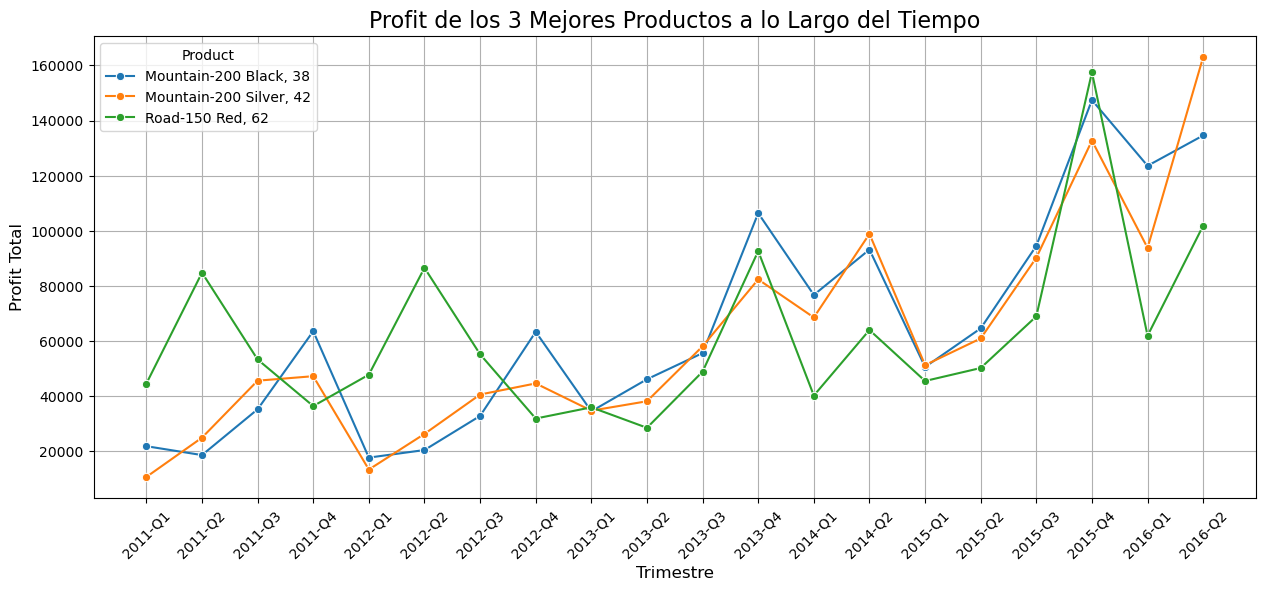

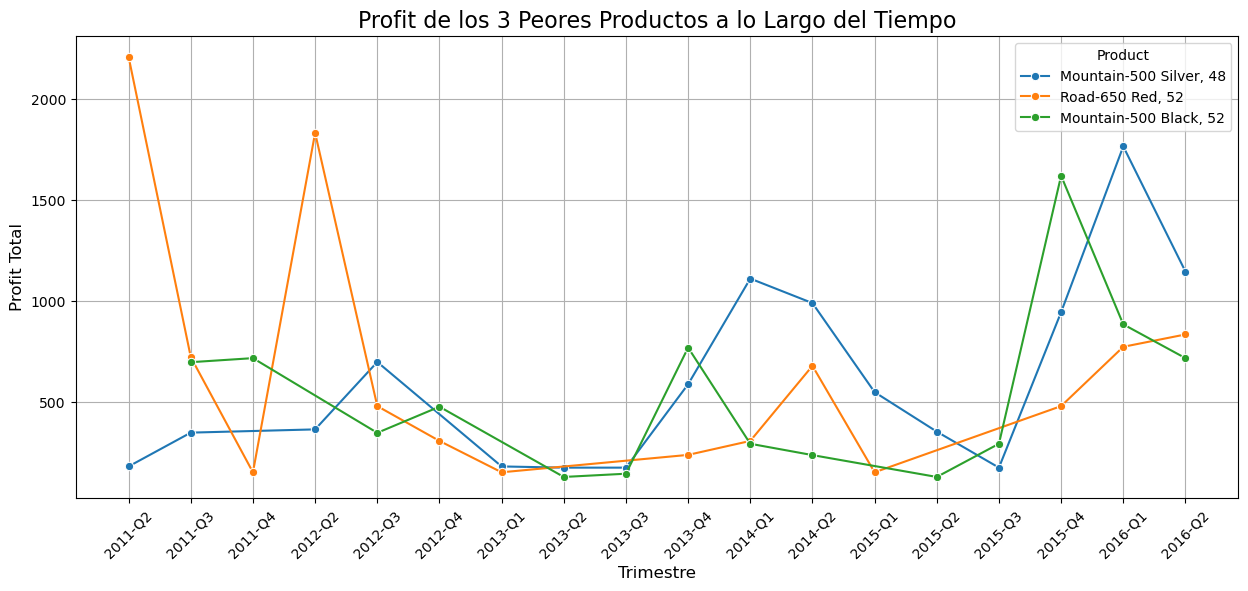

In [26]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=df_top_products,
    x='Periodo_temporal_separado',
    y='Profit_total_periodo',
    hue='Product',
    marker='o'
)
plt.title('Profit de los 3 Mejores Productos a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Profit Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(
    data=df_peores_products,
    x='Periodo_temporal_separado',
    y='Profit_total_periodo',
    hue='Product',
    marker='o'
)
plt.title('Profit de los 3 Peores Productos a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Profit Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

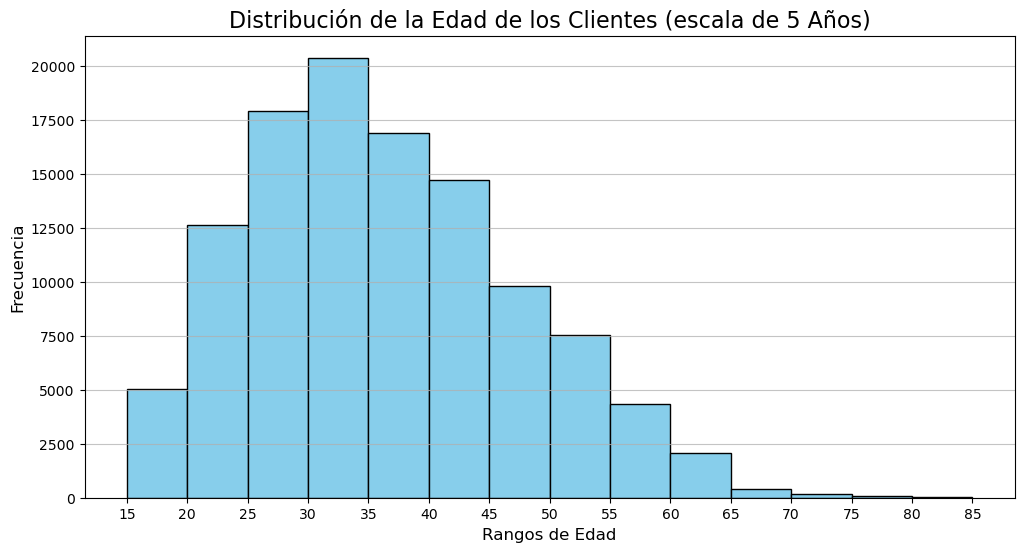

In [27]:
escala_5_años = range(15, 90, 5)

plt.figure(figsize=(12, 6))
plt.hist(df['Customer_Age'], bins=escala_5_años, edgecolor='black', color='skyblue')

plt.title('Distribución de la Edad de los Clientes (escala de 5 Años)', fontsize=16)
plt.xlabel('Rangos de Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(escala_5_años) 
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_9376\776813144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_por_edad = df.groupby('Age_Group')['Profit'].sum().reset_index()


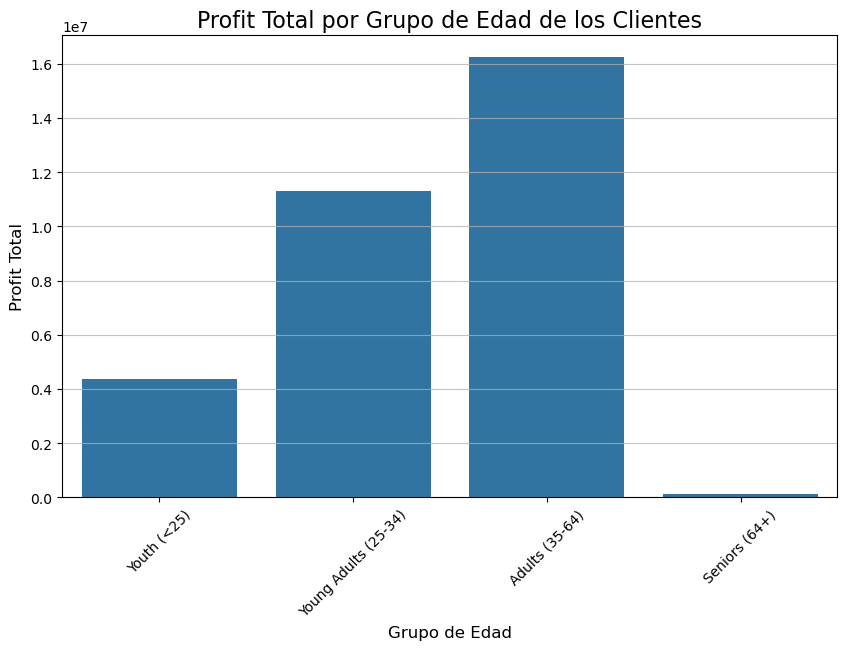

Profit Total por Grupo de Edad:
              Age_Group    Profit
3           Youth (<25)   4359006
2  Young Adults (25-34)  11314684
0        Adults (35-64)  16234940
1         Seniors (64+)    137609


In [28]:
profit_por_edad = df.groupby('Age_Group')['Profit'].sum().reset_index()

orden_edades = ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']
profit_por_edad['Age_Group'] = pd.Categorical(profit_por_edad['Age_Group'], categories=orden_edades, ordered=True)
profit_por_edad = profit_por_edad.sort_values('Age_Group')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=profit_por_edad,
    x='Age_Group',
    y='Profit'
)

plt.title('Profit Total por Grupo de Edad de los Clientes', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Profit Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Profit Total por Grupo de Edad:")
print(profit_por_edad)

C:\Users\PC\AppData\Local\Temp\ipykernel_9376\1238797366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_por_edad = df.groupby('Age_Group').agg(


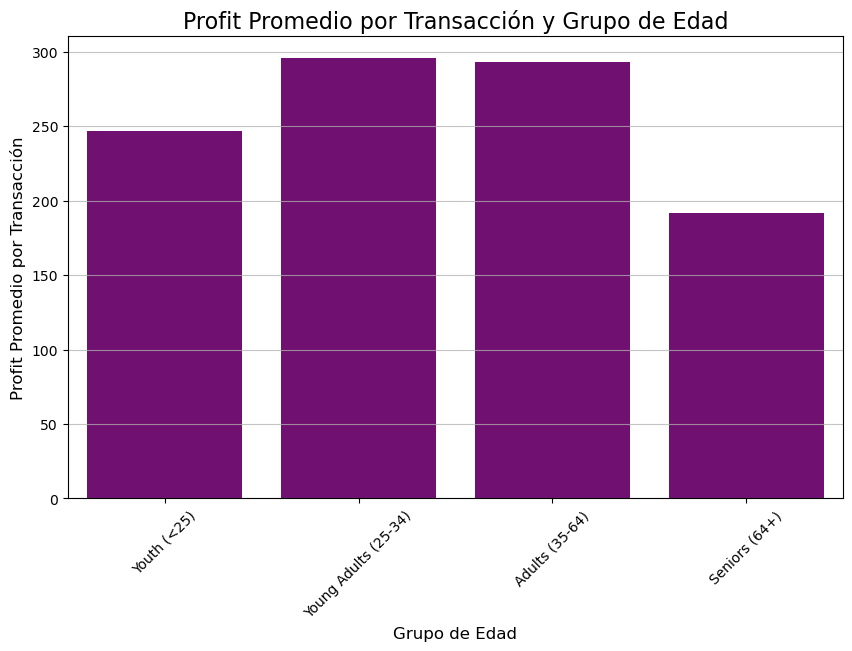

Análisis de Profit por Grupo de Edad:
              Age_Group  Profit_promedio_por_transaccion
3           Youth (<25)                           246.83
2  Young Adults (25-34)                           295.43
0        Adults (35-64)                           293.27
1         Seniors (64+)                           191.39


In [29]:
analisis_por_edad = df.groupby('Age_Group').agg(
    Profit_total=('Profit', 'sum'),
    Numero_transacciones=('Profit', 'count')
).reset_index()

analisis_por_edad['Profit_promedio_por_transaccion'] = analisis_por_edad['Profit_total'] / analisis_por_edad['Numero_transacciones']
analisis_por_edad['Profit_promedio_por_transaccion'] = analisis_por_edad['Profit_promedio_por_transaccion'].round(2)

orden_edades = ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']
analisis_por_edad['Age_Group'] = pd.Categorical(analisis_por_edad['Age_Group'], categories=orden_edades, ordered=True)
analisis_por_edad = analisis_por_edad.sort_values('Age_Group')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=analisis_por_edad,
    x='Age_Group',
    y='Profit_promedio_por_transaccion',
    color='purple'
)

plt.title('Profit Promedio por Transacción y Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Profit Promedio por Transacción', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Análisis de Profit por Grupo de Edad:")
print(analisis_por_edad[['Age_Group', 'Profit_promedio_por_transaccion']])